# Analisando FIIs e Indicadores

## Coletando dados
fonte: https://statusinvest.com.br/fundos-imobiliarios/busca-avancada

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")

plt.style.use("cyberpunk")

In [2]:
df = pd.read_csv('statusinvest-busca-avancada_21_07_2025.csv', sep=';')

df.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"88,09","1,150000","8,96","106,80","0,82","72.317,48","1,89","7,85","23,37","502.949.501,57","14.903,00",Passiva,"4.709.082,00"
1,AFHI11,"91,89","1,090000","12,71","94,76","0,97","787.285,52","1,81","-3,18","10,91","431.693.502,56","39.578,00",Ativa,"4.555.618,00"
2,AIEC11,"46,22","0,320000","13,89","77,57","0,60","241.787,33","5,72","-10,68","-1,75","374.250.889,38","16.334,00",Ativa,"4.824.987,00"
3,AJFI11,"7,19","0,060000","11,35","12,15","0,59","192.215,43","0,77",NaN,NaN,"384.210.693,68","13.014,00",Ativa,"31.625.978,00"
4,ALMI11,"595,00","5,256487","6,71","2.108,52","0,28","9.845,44","4,35",NaN,"-9,16","234.419.016,12","1.971,00",Passiva,"111.177,00"


In [3]:
df = df.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TICKER                   593 non-null    string
 1   PRECO                    593 non-null    string
 2   ULTIMO DIVIDENDO         488 non-null    string
 3   DY                       593 non-null    string
 4   VALOR PATRIMONIAL COTA   588 non-null    string
 5   P/VP                     480 non-null    string
 6   LIQUIDEZ MEDIA DIARIA    433 non-null    string
 7   PERCENTUAL EM CAIXA      576 non-null    string
 8   CAGR DIVIDENDOS 3 ANOS   289 non-null    string
 9    CAGR VALOR CORA 3 ANOS  295 non-null    string
 10  PATRIMONIO               588 non-null    string
 11  N COTISTAS               588 non-null    string
 12  GESTAO                   475 non-null    string
 13   N COTAS                 593 non-null    string
dtypes: string(14)
memory usage: 65.0 KB


In [4]:
cols = list(df.columns)

df[cols] = df[cols].apply(lambda x: x.str.replace('.','', regex=False))
df[cols] = df[cols].apply(lambda x: x.str.replace(',','.', regex=False))

cols.remove('TICKER')
cols.remove('GESTAO')

df[cols] = df[cols].astype(float)

df.dropna(inplace=True)

df.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,88.09,1.1500,8.96,106.80,0.82,72317.48,1.89,7.85,23.37,5.029495e+08,14903.0,Passiva,4709082.0
1,AFHI11,91.89,1.0900,12.71,94.76,0.97,787285.52,1.81,-3.18,10.91,4.316935e+08,39578.0,Ativa,4555618.0
2,AIEC11,46.22,0.3200,13.89,77.57,0.60,241787.33,5.72,-10.68,-1.75,3.742509e+08,16334.0,Ativa,4824987.0
6,ALZM11,6.32,0.0800,7.99,7.46,0.85,0.00,3.80,-6.90,-58.23,1.132035e+08,12195.0,Ativa,15180540.0
7,ALZR11,10.02,0.0937,9.60,10.79,0.93,1199797.57,11.35,-12.61,6.78,1.319772e+09,164422.0,Ativa,122266250.0


In [46]:
ifix = pd.read_csv('IFIXDia_21-07-25.csv',sep=';',skiprows=1,encoding='iso-8859-1',index_col=False)[:-2]

ifix.columns = ['TICKER','ACAO','TIPO','QTD_TEORICA','PART_PERC']

ifix.tail()

,TICKER,ACAO,TIPO,QTD_TEORICA,PART_PERC
112,WHGR11,FII WHG REAL,CI,30.912.379,"0,196"
113,XPCI11,FII XP CRED,CI,8.701.552,"0,516"
114,XPLG11,FII XP LOG,CI,31.175.931,"2,244"
115,XPML11,FII XP MALLS,CI ER,56.720.787,"4,173"
116,XPSF11,FII XP SELEC,CI,43.302.140,"0,189"


In [47]:
ifix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TICKER       117 non-null    object
 1   ACAO         117 non-null    object
 2   TIPO         117 non-null    object
 3   QTD_TEORICA  117 non-null    object
 4   PART_PERC    117 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [48]:
data = df.merge(ifix['TICKER'], how='inner', on='TICKER')

data = data[data['GESTAO'] == 'Ativa']

data.drop(['N COTISTAS',' CAGR VALOR CORA 3 ANOS','CAGR DIVIDENDOS 3 ANOS','PERCENTUAL EM CAIXA','VALOR PATRIMONIAL COTA', 'GESTAO'], axis=1, inplace=True)

data

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,P/VP,LIQUIDEZ MEDIA DIARIA,PATRIMONIO,N COTAS
0,AFHI11,91.89,1.0900,12.71,0.97,787285.52,4.316935e+08,4555618.0
1,AIEC11,46.22,0.3200,13.89,0.60,241787.33,3.742509e+08,4824987.0
2,ALZR11,10.02,0.0937,9.60,0.93,1199797.57,1.319772e+09,122266250.0
3,ARRI11,6.87,0.0900,16.01,0.81,191147.76,1.756491e+08,20726973.0
4,BARI11,78.85,1.0500,13.56,0.86,745463.48,4.227748e+08,4634191.0
...,...,...,...,...,...,...,...,...
86,WHGR11,8.79,0.1000,13.60,0.90,273305.10,3.019701e+08,30912378.0
87,XPCI11,82.24,1.0000,12.50,0.92,1173885.05,7.804463e+08,8701551.0
88,XPLG11,99.28,0.8200,9.67,0.93,2232140.57,3.332663e+09,31175931.0
89,XPML11,101.85,0.9200,10.84,0.87,8047811.81,6.658223e+09,56720787.0


# Testando Estratégia DY e P/VP

Quero encontrar FIIs boas pagadoras de dividendos (**alto DY**), desvalorizadas (**baixo P/VP**) e com bons patrimônios (**Alto Patrimonio**)

In [49]:
data['ranking_dy'] = data['DY'].rank(ascending=False)
data['ranking_p_vp'] = data['P/VP'].rank(ascending=True)
data['ranking_patrimonio'] = data['PATRIMONIO'].rank(ascending=False)

data['ranking_final'] = data['ranking_dy'] + data['ranking_p_vp']

data['rank_final'] = data['ranking_dy'] + data['ranking_p_vp'] + data['ranking_patrimonio']

data.sort_values(by='ranking_final').head(10)

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,P/VP,LIQUIDEZ MEDIA DIARIA,PATRIMONIO,N COTAS,ranking_dy,ranking_p_vp,ranking_patrimonio,ranking_final,rank_final
23,HCTR11,23.45,0.3759,17.55,0.22,599526.00,2.307510e+09,22084202.0,3.0,1.0,17.0,4.0,21.0
76,URPR11,39.77,0.4500,24.14,0.40,652422.38,1.170107e+09,11733895.0,1.0,3.0,47.0,4.0,51.0
17,DEVA11,33.09,0.4600,16.02,0.34,520307.00,1.364551e+09,14044908.0,8.0,2.0,40.0,10.0,50.0
8,BPML11,79.80,0.9200,18.37,0.61,638566.62,9.690902e+08,7441745.0,2.0,10.0,51.0,12.0,63.0
84,VIUR11,5.55,0.0670,14.49,0.63,231402.81,2.357167e+08,26946220.0,16.0,12.5,85.0,28.5,113.5
36,IRDM11,60.80,0.8400,15.54,0.73,3429530.67,3.018083e+09,36433827.0,10.0,19.0,10.0,29.0,39.0
51,MFII11,80.29,1.1100,17.09,0.77,654771.52,6.190007e+08,5962395.0,4.0,25.0,64.0,29.0,93.0
1,AIEC11,46.22,0.3200,13.89,0.60,241787.33,3.742509e+08,4824987.0,24.0,9.0,74.0,33.0,107.0
6,BCRI11,63.65,0.8500,15.18,0.74,393173.52,5.359906e+08,6257873.0,12.0,21.5,65.0,33.5,98.5
72,TGAR11,85.49,1.0000,15.07,0.77,2937174.57,2.619551e+09,23567968.0,13.0,25.0,15.0,38.0,53.0


In [50]:
data.sort_values(by='rank_final').head(10)

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,P/VP,LIQUIDEZ MEDIA DIARIA,PATRIMONIO,N COTAS,ranking_dy,ranking_p_vp,ranking_patrimonio,ranking_final,rank_final
23,HCTR11,23.45,0.3759,17.55,0.22,599526.00,2.307510e+09,22084202.0,3.0,1.0,17.0,4.0,21.0
36,IRDM11,60.80,0.8400,15.54,0.73,3429530.67,3.018083e+09,36433827.0,10.0,19.0,10.0,29.0,39.0
17,DEVA11,33.09,0.4600,16.02,0.34,520307.00,1.364551e+09,14044908.0,8.0,2.0,40.0,10.0,50.0
76,URPR11,39.77,0.4500,24.14,0.40,652422.38,1.170107e+09,11733895.0,1.0,3.0,47.0,4.0,51.0
72,TGAR11,85.49,1.0000,15.07,0.77,2937174.57,2.619551e+09,23567968.0,13.0,25.0,15.0,38.0,53.0
10,BRCR11,41.90,0.4100,13.48,0.49,885022.62,2.263416e+09,26638202.0,34.0,4.0,18.0,38.0,56.0
8,BPML11,79.80,0.9200,18.37,0.61,638566.62,9.690902e+08,7441745.0,2.0,10.0,51.0,12.0,63.0
51,MFII11,80.29,1.1100,17.09,0.77,654771.52,6.190007e+08,5962395.0,4.0,25.0,64.0,29.0,93.0
63,RBVA11,8.37,0.0900,13.38,0.79,1849928.67,1.659679e+09,156143050.0,35.0,30.0,31.0,65.0,96.0
6,BCRI11,63.65,0.8500,15.18,0.74,393173.52,5.359906e+08,6257873.0,12.0,21.5,65.0,33.5,98.5


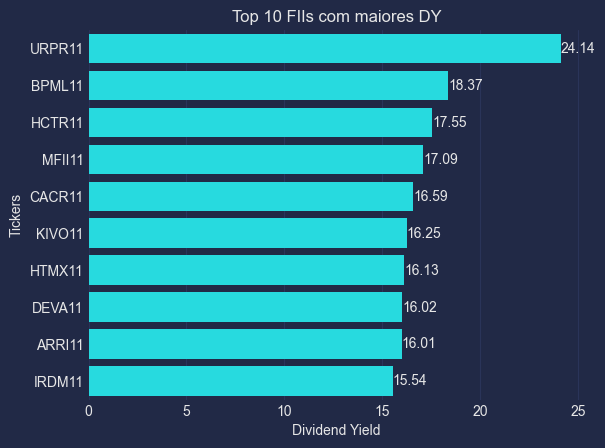

In [51]:
rank_dy = data.sort_values(by='DY', ascending=False).head(10)

ax = sns.barplot(rank_dy,y='TICKER',x='DY',orient='h', color='#08F7FE')
ax.bar_label(ax.containers[0])

plt.title('Top 10 FIIs com maiores DY')
plt.xlabel('Dividend Yield')
plt.ylabel('Tickers')

plt.show()

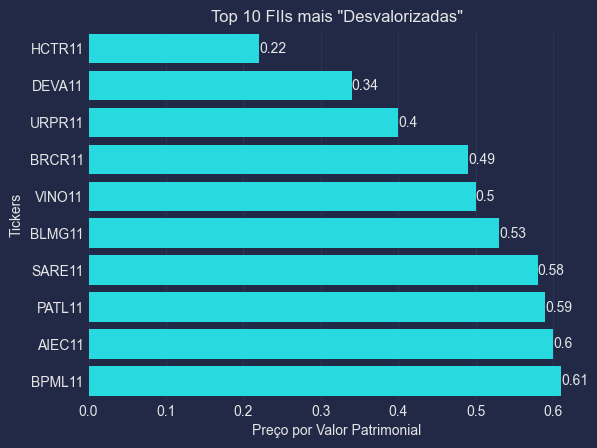

In [52]:
rank_p_vp = data.sort_values(by='P/VP', ascending=False).tail(10)

ax = sns.barplot(rank_p_vp.sort_values(by='P/VP'),y='TICKER',x='P/VP',orient='h', color='#08F7FE')
ax.bar_label(ax.containers[0])

plt.title('Top 10 FIIs mais "Desvalorizadas"')
plt.xlabel('Preço por Valor Patrimonial')
plt.ylabel('Tickers')

plt.show()

In [53]:
rank_final = data.sort_values(by='rank_final').head(10)
rank_final

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,P/VP,LIQUIDEZ MEDIA DIARIA,PATRIMONIO,N COTAS,ranking_dy,ranking_p_vp,ranking_patrimonio,ranking_final,rank_final
23,HCTR11,23.45,0.3759,17.55,0.22,599526.00,2.307510e+09,22084202.0,3.0,1.0,17.0,4.0,21.0
36,IRDM11,60.80,0.8400,15.54,0.73,3429530.67,3.018083e+09,36433827.0,10.0,19.0,10.0,29.0,39.0
17,DEVA11,33.09,0.4600,16.02,0.34,520307.00,1.364551e+09,14044908.0,8.0,2.0,40.0,10.0,50.0
76,URPR11,39.77,0.4500,24.14,0.40,652422.38,1.170107e+09,11733895.0,1.0,3.0,47.0,4.0,51.0
72,TGAR11,85.49,1.0000,15.07,0.77,2937174.57,2.619551e+09,23567968.0,13.0,25.0,15.0,38.0,53.0
10,BRCR11,41.90,0.4100,13.48,0.49,885022.62,2.263416e+09,26638202.0,34.0,4.0,18.0,38.0,56.0
8,BPML11,79.80,0.9200,18.37,0.61,638566.62,9.690902e+08,7441745.0,2.0,10.0,51.0,12.0,63.0
51,MFII11,80.29,1.1100,17.09,0.77,654771.52,6.190007e+08,5962395.0,4.0,25.0,64.0,29.0,93.0
63,RBVA11,8.37,0.0900,13.38,0.79,1849928.67,1.659679e+09,156143050.0,35.0,30.0,31.0,65.0,96.0
6,BCRI11,63.65,0.8500,15.18,0.74,393173.52,5.359906e+08,6257873.0,12.0,21.5,65.0,33.5,98.5


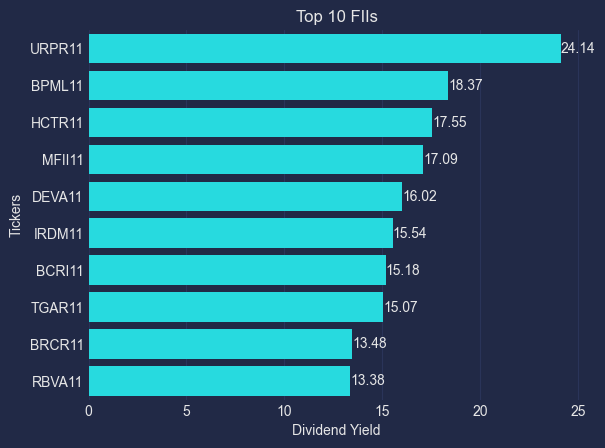

In [54]:
rank_final = data.sort_values(by='rank_final').head(10)

ax = sns.barplot(rank_final.sort_values(by='DY', ascending=False),y='TICKER',x='DY',orient='h', color='#08F7FE')
ax.bar_label(ax.containers[0])

plt.title('Top 10 FIIs')
plt.xlabel('Dividend Yield')
plt.ylabel('Tickers')

plt.show()

## Analisando Carteiras

In [55]:
ativos = [x + '.SA' for x in rank_final['TICKER']]
ativos

['HCTR11.SA',
 'IRDM11.SA',
 'DEVA11.SA',
 'URPR11.SA',
 'TGAR11.SA',
 'BRCR11.SA',
 'BPML11.SA',
 'MFII11.SA',
 'RBVA11.SA',
 'BCRI11.SA']

In [56]:
from datetime import date

inicio = '2025-01-01'
fim = date.today()

carteira = yf.download(tickers=ativos, start=inicio, end=fim)['Close']

carteira.head()

[*********************100%***********************]  10 of 10 completed


Ticker,BCRI11.SA,BPML11.SA,BRCR11.SA,DEVA11.SA,HCTR11.SA,IRDM11.SA,MFII11.SA,RBVA11.SA,TGAR11.SA,URPR11.SA
Date,,,,,,,,,,
2025-01-02,53.364700,65.982239,38.625332,27.771553,15.650517,58.097187,84.661934,8.275844,81.017914,52.539814
2025-01-03,53.939713,64.932343,37.800354,27.400543,16.946644,58.464314,84.858513,8.450335,81.979195,52.678925
2025-01-06,55.822414,65.398972,37.902321,27.219561,16.276537,58.455135,85.186150,8.398562,81.531219,51.445423
2025-01-07,55.284496,65.784821,37.930130,27.174316,16.329441,58.546921,85.186150,8.021776,81.811203,51.955521
2025-01-08,54.737312,65.955322,37.920856,26.794258,15.738689,58.133900,84.933395,7.957541,79.543343,52.818043


In [57]:
pesos = 1/len(ativos)

<Axes: xlabel='Date'>

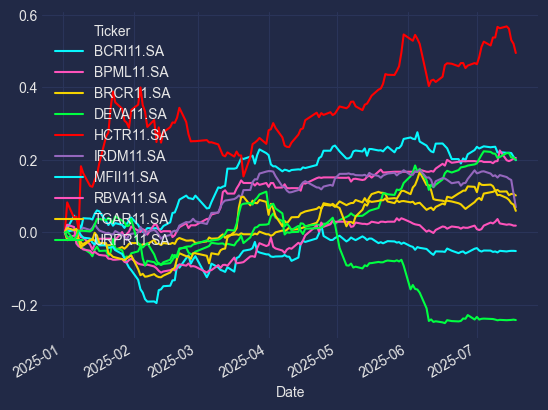

In [58]:
((carteira/carteira.iloc[0]) - 1).plot()

<Axes: xlabel='Date'>

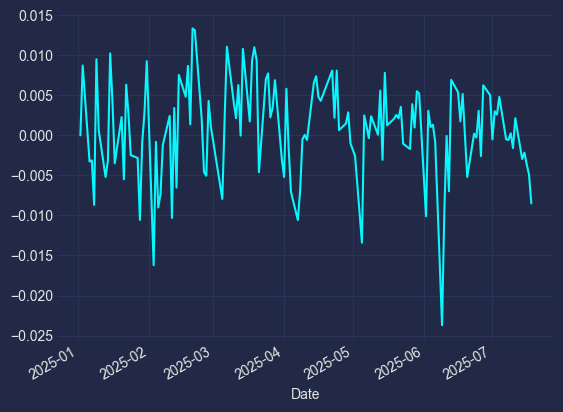

In [59]:
retornos = carteira.pct_change()

retorno_carteira = (retornos*pesos).sum(axis=1)

retorno_carteira.plot()

<Axes: xlabel='Date'>

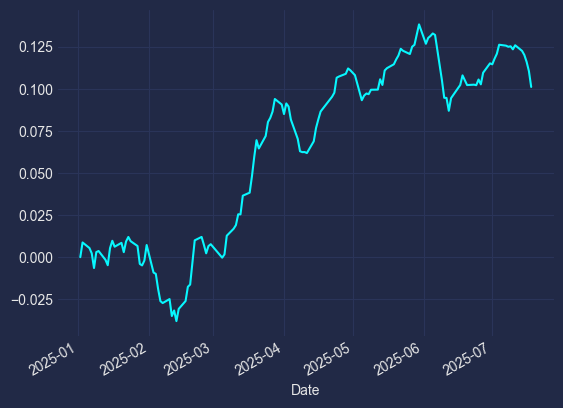

In [60]:
retorno_acum_carteira = (1 + retorno_carteira).cumprod() - 1

retorno_acum_carteira.plot()

[                       0%                       ]

[*********************100%***********************]  10 of 10 completed


<Axes: xlabel='Date'>

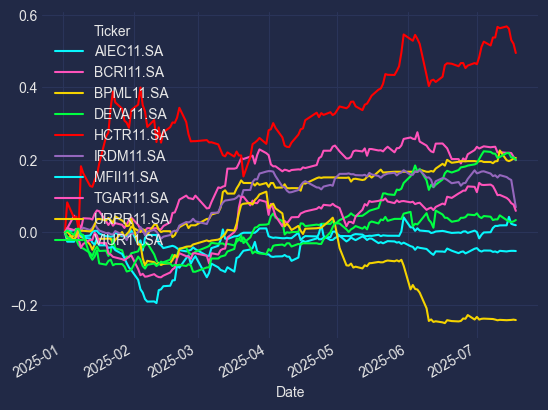

In [61]:
# Ranking final considerando apenas os indicadores de DY e P/VP

ranking_dy_pvp = data.sort_values(by='ranking_final').head(10)

ativos = [x + '.SA' for x in ranking_dy_pvp['TICKER']]

inicio = '2025-01-01'
fim = date.today()

carteira_v2 = yf.download(tickers=ativos, start=inicio, end=fim)['Close']

(carteira_v2/carteira_v2.iloc[0] - 1).plot()

<Axes: xlabel='Date'>

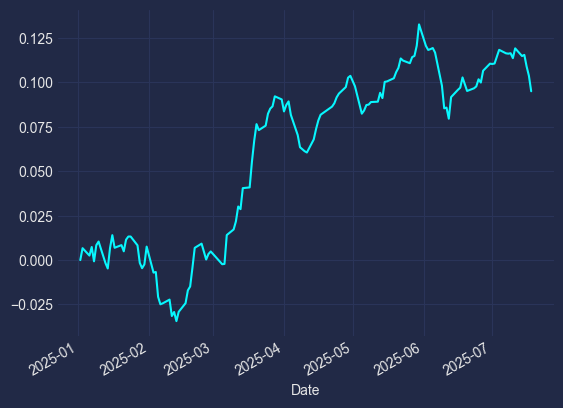

In [62]:
retornos = carteira_v2.pct_change()

retorno_carteira = (retornos*pesos).sum(axis=1)

retorno_acum_carteira_v2 =  (1 + retorno_carteira).cumprod() - 1

retorno_acum_carteira_v2.plot()

### Comparativo com IFIX

[*********************100%***********************]  1 of 1 completed

<Axes: xlabel='Date'>

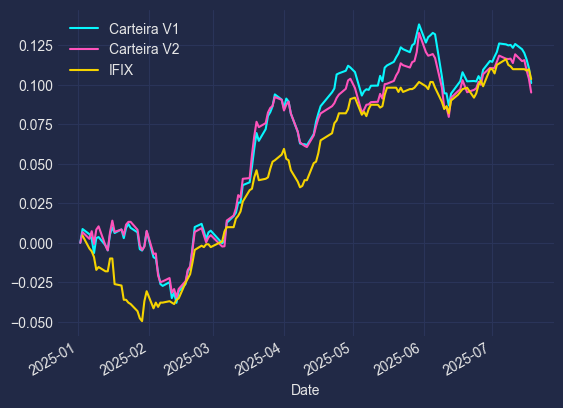

In [63]:
ifix = yf.download('XFIX11.SA', start=inicio, end=fim)['Close']

retorno_ifix = ifix.pct_change()

retorno_acum_ifix = (1 + retorno_ifix).cumprod() - 1

retorno_portfolio = pd.DataFrame()
retorno_portfolio['Carteira V1'] = retorno_acum_carteira
retorno_portfolio['Carteira V2'] = retorno_acum_carteira_v2
retorno_portfolio['IFIX'] = retorno_acum_ifix

retorno_portfolio.plot()